# Introduction to geospatial vector data in Python

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

## Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the `fiona` library under the hood, which is an interface to GDAL/OGR), using the `geopandas.read_file` function.

For example, let's start by reading a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/, zip file is available in the `/data` directory), and inspect the data:

In [2]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [3]:
# Get list of all the columns
columns = list(countries.columns)
columns

['iso_a3', 'name', 'continent', 'pop_est', 'gdp_md_est', 'geometry']

In [4]:
# List the first 10 records
countries.head(10)

iso_a3                    name                continent     pop_est  \
0    AFG             Afghanistan                     Asia  34124811.0   
1    AGO                  Angola                   Africa  29310273.0   
2    ALB                 Albania                   Europe   3047987.0   
3    ARE    United Arab Emirates                     Asia   6072475.0   
4    ARG               Argentina            South America  44293293.0   
5    ARM                 Armenia                     Asia   3045191.0   
6    ATA              Antarctica               Antarctica      4050.0   
7    ATF  Fr. S. Antarctic Lands  Seven seas (open ocean)       140.0   
8    AUS               Australia                  Oceania  23232413.0   
9    AUT                 Austria                   Europe   8754413.0   

   gdp_md_est                                           geometry  
0     64080.0  POLYGON ((61.21081709172574 35.65007233330923,...  
1    189000.0  (POLYGON ((23.90415368011818 -11.7222815894063...  
2     33900.0  POLYGON ((21.0200403174764 40.84272695572588, ...  
3    667200.0  POLYGON ((51.57951867046327 24.24549713795111,...  
4    879400.0  (POLYGON ((-66.95992000000001 -54.896810000000...  
5     26300.0  POLYGON ((43.58274580259273 41.09214325618257,...  
6       810.0  (POLYGON ((-59.57209469261159 -80.040178725096...  
7        16.0  POLYGON ((68.935 -48.62500000000001, 69.58 -48...  
8   1189000.0  (POLYGON ((145.3979781434949 -40.7925485166059...  
9    416600.0  POLYGON ((16.97966678230404 48.12349701597631,...

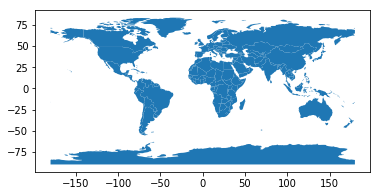

In [5]:
# plot the dataset
countries.plot()

What can we observe:

- Using `.head()` we can see the first rows of the dataset, just like we can do with Pandas.
- There is a 'geometry' column and the different countries are represented as polygons
- We can use the `.plot()` method to quickly get a *basic* visualization of the data

## What's a GeoDataFrame?

We used the GeoPandas library to read in the geospatial data, and this returned us a `GeoDataFrame`:

In [6]:
type(countries)

geopandas.geodataframe.GeoDataFrame

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will see in later notebooks

In [7]:
# Print out the geometry list - limit to 10
countries.head(10).geometry

0    POLYGON ((61.21081709172574 35.65007233330923,...
1    (POLYGON ((23.90415368011818 -11.7222815894063...
2    POLYGON ((21.0200403174764 40.84272695572588, ...
3    POLYGON ((51.57951867046327 24.24549713795111,...
4    (POLYGON ((-66.95992000000001 -54.896810000000...
5    POLYGON ((43.58274580259273 41.09214325618257,...
6    (POLYGON ((-59.57209469261159 -80.040178725096...
7    POLYGON ((68.935 -48.62500000000001, 69.58 -48...
8    (POLYGON ((145.3979781434949 -40.7925485166059...
9    POLYGON ((16.97966678230404 48.12349701597631,...
Name: geometry, dtype: object

In [8]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [9]:
# print out the areas for the countries - limit = 10
countries.head(10).geometry.area
# countries.geometry.area # Uncomment this to list all the 157 countries

0      63.593500
1     103.599439
2       3.185163
3       7.095047
4     278.923392
5       3.030560
6    6028.836194
7       1.432928
8     695.545501
9      10.179604
dtype: float64

**It's still a DataFrame**, so we have all the pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

For example, we can calculate average population number over all countries (by accessing the 'pop_est' column, and calling the `mean` method on it):

In [10]:
countries['pop_est'].mean()

41712369.84180791

Or, we can use boolean filtering to select a subset of the dataframe based on a condition:

In [11]:
# Get all the countries from the continent of Africa
africa = countries[countries['continent'] == 'Africa']

In [12]:
print(f"Africa has {len(africa)} countries.")

Africa has 51 countries.


Clearly some countries have not been captured in this dataset

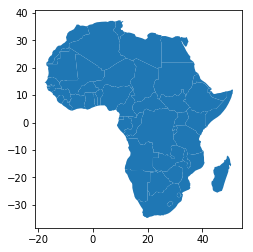

In [13]:
africa.plot()

---

The rest of the tutorial is going to assume you already know some pandas basics, but we will try to give hints for that part for those that are not familiar.   
A few resources in case you want to learn more about pandas:

- Pandas docs: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Other tutorials: chapter from pandas in https://jakevdp.github.io/PythonDataScienceHandbook/, https://github.com/jorisvandenbossche/pandas-tutorial, https://github.com/TomAugspurger/pandas-head-to-tail, ...

<div class="alert alert-info" style="font-size:120%">

**REMEMBER:** <br>

* A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations
* A `GeoDataFrame` (or *Feature Collection*) consists of:
    * **Geometries** or **features**: the spatial objects
    * **Attributes** or **properties**: columns with information about each spatial object

</div>

## Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

![](img/simple_features_3_text.svg)

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

And each of them can also be combined in multi-part geometries (See https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects for extensive overview).

For the example we have seen up to now, the individual geometry objects are Polygons:

In [14]:
print(countries.geometry[2])

POLYGON ((21.0200403174764 40.84272695572588, 20.99998986174722 40.58000397395401, 20.67499677906363 40.43499990494303, 20.61500044117275 40.11000682225935, 20.15001590341052 39.62499766698397, 19.98000044117015 39.69499339452341, 19.96000166187321 39.91500580500605, 19.40608198413673 40.25077342382247, 19.31905887215714 40.72723012955356, 19.40354983895429 41.40956574153546, 19.54002729663711 41.71998607031276, 19.37176883309496 41.87754751237065, 19.37176816334725 41.8775506797835, 19.30448611825079 42.19574514420782, 19.73805138517963 42.68824738216557, 19.80161339689869 42.50009349219084, 20.07070000000004 42.58863000000008, 20.28375451018189 42.32025950781508, 20.52295000000004 42.21787000000006, 20.59024654668023 41.85540891928363, 20.59024743010491 41.85540416113361, 20.4631750830992 41.51508901627534, 20.60518191903736 41.08622630468523, 21.0200403174764 40.84272695572588))


Let's import some other datasets with different types of geometry objects.

A dateset about cities in the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, zip file is available in the `/data` directory), consisting of Point data:

In [15]:
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")

In [16]:
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


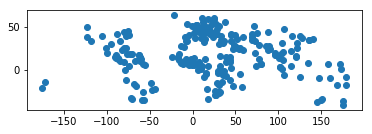

In [17]:
cities.plot()

And a dataset of rivers in the world (from http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/, zip file is available in the `/data` directory) where each river is a (multi-)line:

In [18]:
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

In [19]:
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


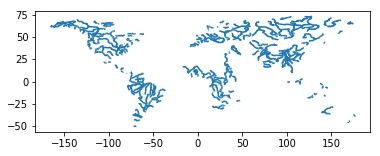

In [20]:
rivers.plot()

### The `shapely` library

The individual geometry objects are provided by the [`shapely`](https://shapely.readthedocs.io/en/stable/) library

In [21]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

To construct one ourselves:

In [22]:
from shapely.geometry import Point, Polygon, LineString

In [23]:
p = Point(0, 0)

In [24]:
print(p)

POINT (0 0)


In [25]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

In [26]:
polygon.area

0.5

In [27]:
polygon.distance(p)

1.4142135623730951

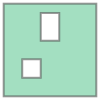

In [28]:
# creating a polygon with holes
poly2 = Polygon([(0,0),(10,0),(10,10),(0,10),(0,0)],holes=[[(4,6),(6,6),(6,9),(4,9),(4,6)],[(2,2),(2,4),(4,4),(4,2),(2,2)]])
poly2

In [29]:
poly2.area

90.0

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

Single geometries are represented by `shapely` objects:

* If you access a single geometry of a GeoDataFrame, you get a shapely geometry object
* Those objects have similar functionality as geopandas objects (GeoDataFrame/GeoSeries). For example:
    * `single_shapely_object.distance(other_point)` -> distance between two points
    * `geodataframe.distance(other_point)` ->  distance for each point in the geodataframe to the other point

</div>

## Plotting our different layers together

[(-40, 40), (-20, 60)]

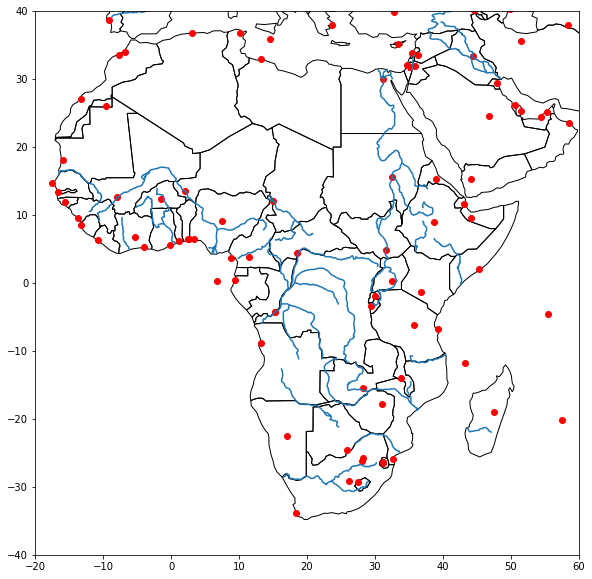

In [30]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

See the [04-more-on-visualization.ipynb](04-more-on-visualization.ipynb) notebook for more details on visualizing geospatial datasets.

## Let's practice!

Throughout the exercises in this course, we will work with several datasets about the city of Paris.

Here, we start with the following datasets:

- The administrative districts of Paris (https://opendata.paris.fr/explore/dataset/quartier_paris/): `paris_districts_utm.geojson`
- Real-time (at the moment I downloaded them ..) information about the public bicycle sharing system in Paris (vélib, https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/): `data/paris_bike_stations_mercator.gpkg`

Both datasets are provided as  files.

Let's explore those datasets:

<div class="alert alert-success">

**EXERCISE**:

We will start with exploring the bicycle station dataset (available as a GeoPackage file: `data/paris_bike_stations_mercator.gpkg`)
    
* Read the stations datasets into a GeoDataFrame called `stations`.
* Check the type of the returned object (with `type(..)`)
* Check the first rows of the dataframes. What kind of geometries dooes this datasets contain?
* How many features are there in the dataset? (hint: use the `.shape` attribute)
    
<details><summary>Hints</summary>

* The geopandas.read_file() function can read different geospatial file formats. You pass the file name as first argument.

</details>
    
    
</div>

In [31]:
# %load _solved/solutions/01-introduction-geospatial-data1.py
stations = geopandas.read_file("data/paris_bike_stations_mercator.gpkg")

In [32]:
# %load _solved/solutions/01-introduction-geospatial-data2.py
type(stations)

geopandas.geodataframe.GeoDataFrame

In [33]:
# %load _solved/solutions/01-introduction-geospatial-data3.py
stations.head()

name  bike_stands  available_bikes  \
0               14002 - RASPAIL QUINET           44                4   
1  20503 - COURS DE VINCENNES PYRÉNÉES           21                3   
2             20011 - PYRÉNÉES-DAGORNO           21                0   
3        31008 - VINCENNES (MONTREUIL)           56                0   
4          43006 - MINIMES (VINCENNES)           28               27   

                                      geometry  
0   POINT (259324.8871962921 6247620.77104855)  
1  POINT (267824.3774264774 6249062.894141703)  
2   POINT (267742.1349896559 6250378.46894339)  
3  POINT (271326.6382502856 6250750.824378789)  
4  POINT (270594.6892034157 6248007.705192606)

In [34]:
# %load _solved/solutions/01-introduction-geospatial-data4.py
stations.shape

(1226, 4)

<div class="alert alert-success">

**EXERCISE**:

* Make a quick plot of the `stations` dataset.
* Make the plot a bit larger byt setting the figure size to (12, 6) (hint: the `plot` method accepts a `figsize` keyword).
 
</div>

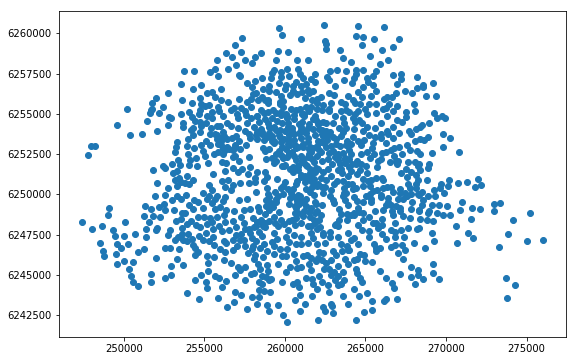

In [35]:
# %load _solved/solutions/01-introduction-geospatial-data5.py
stations.plot(figsize=(12,6))

A plot with just some points can be hard to interpret without any spatial context. Therefore, in the next exercise we will learn how to add a background map.

We are going to make use of the [contextily](https://github.com/darribas/contextily) package. The `add_basemap()` function of this package makes it easy to add a background web map to our plot. We begin by plotting our data first, and then pass the matplotlib axes object (returned by dataframe's `plot()` method) to the `add_basemap()` function. `contextily` will then download the web tiles needed for the geographical extent of your plot.




<div class="alert alert-success">

**EXERCISE**:

* Import `contextily`.
* Re-do the figure of the previous exercise: make a plot of all the points in `stations`, but assign the result to an `ax` variable.
* Set the marker size equal to 5 to reduce the size of the points (use the `markersize` keyword of the `plot()` method for this).
* Use the `add_basemap()` function of `contextily` to add a background map: the first argument is the matplotlib axes object `ax`.

</div>

In [36]:
# %load _solved/solutions/01-introduction-geospatial-data6.py
import contextily

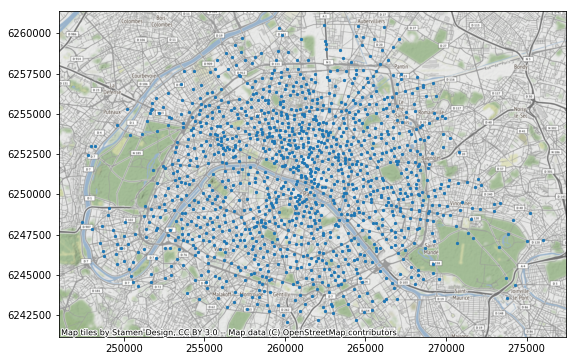

In [37]:
# %load _solved/solutions/01-introduction-geospatial-data7.py
ax = stations.plot(figsize=(12,6), markersize=5)
contextily.add_basemap(ax)

<div class="alert alert-success">

**EXERCISE**:

* Make a histogram showing the distribution of the number of bike stands in the stations.

<details>
  <summary>Hints</summary>

* Selecting a column can be done with the square brackets: `df['col_name']`
* Single columns have a `hist()` method to plot a histogram of its values.
    
</details>
    
</div>

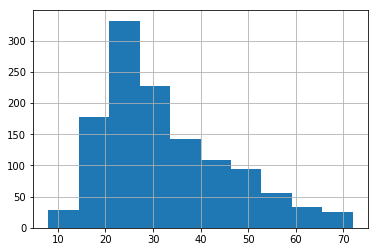

In [38]:
# %load _solved/solutions/01-introduction-geospatial-data8.py
stations['bike_stands'].hist()

<div class="alert alert-success">

**EXERCISE**:

Let's now visualize where the available bikes are actually stationed:
    
* Make a plot of the `stations` dataset (also with a (12, 6) figsize).
* Use the `'available_bikes'` colums to determine the color of the points. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.
 
</div>

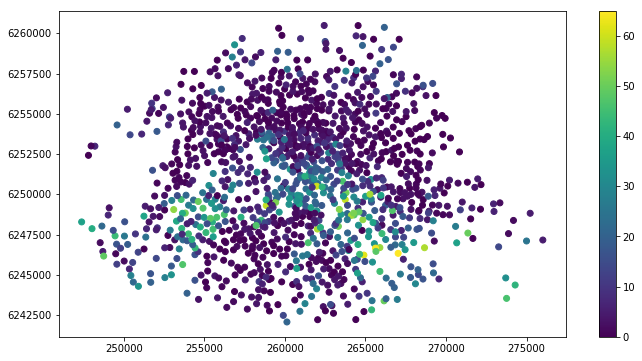

In [39]:
# %load _solved/solutions/01-introduction-geospatial-data9.py
stations.plot(figsize=(12, 6), column='available_bikes', legend=True)

<div class="alert alert-success">

**EXERCISE**:

Next, we will explore the dataset on the administrative districts of Paris (available as a GeoJSON file: "data/paris_districts_utm.geojson")

* Read the dataset into a GeoDataFrame called `districts`.
* Check the first rows of the dataframe. What kind of geometries does this dataset contain?
* How many features are there in the dataset? (hint: use the `.shape` attribute)
* Make a quick plot of the `districts` dataset (set the figure size to (12, 6)).
    
</div>

In [40]:
# %load _solved/solutions/01-introduction-geospatial-data10.py
districts = geopandas.read_file("data/paris_districts_utm.geojson")

In [41]:
# %load _solved/solutions/01-introduction-geospatial-data11.py
districts.head()

id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.1333912524 5411438.484355546,...  
1  POLYGON ((452278.4194036503 5412160.89282334, ...  
2  POLYGON ((451553.8057660239 5412340.522224233,...  
3  POLYGON ((451004.907944323 5412654.094913081, ...  
4  POLYGON ((451328.7522686935 5412991.278156867,...

In [42]:
# %load _solved/solutions/01-introduction-geospatial-data12.py
districts.shape

(80, 4)

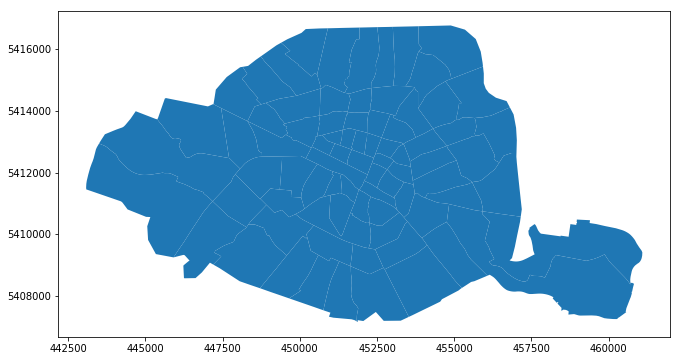

In [43]:
# %load _solved/solutions/01-introduction-geospatial-data13.py
districts.plot(figsize=(12, 6))

<div class="alert alert-success">

**EXERCISE**:
    
What are the largest districts (biggest area)?

* Calculate the area of each district.
* Add this area as a new column to the `districts` dataframe.
* Sort the dataframe by this area column for largest to smallest values (descending).

<details><summary>Hints</summary>

* Adding a column can be done by assing values to a column using the same square brackets syntax: `df['new_col'] = values`
* To sort the rows of a DataFrame, use the `sort_values()` method, specifying the colum to sort on with the `by='col_name'` keyword. Check the help of this method to see how to sort ascending or descending.

</details>

</div>

In [44]:
# %load _solved/solutions/01-introduction-geospatial-data14.py
districts.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
5     2.434179e+05
6     2.779910e+05
7     2.812949e+05
8     3.179144e+05
9     2.716030e+05
10    3.675315e+05
11    2.132014e+05
12    3.128737e+05
13    4.218047e+05
14    4.870094e+05
15    3.780538e+05
16    6.038437e+05
17    7.979828e+05
18    7.032747e+05
19    4.329736e+05
20    2.932068e+05
21    7.157800e+05
22    8.608673e+05
23    2.821319e+05
24    8.261271e+05
25    1.073169e+06
26    8.074561e+05
27    1.381170e+06
28    1.139641e+06
29    7.961535e+05
          ...     
50    2.230432e+06
51    6.917246e+05
52    1.125644e+06
53    1.357300e+06
54    1.345126e+06
55    1.784082e+06
56    2.827822e+06
57    1.577691e+06
58    1.477546e+06
59    2.607729e+06
60    6.380679e+06
61    5.475037e+06
62    3.085061e+06
63    1.423272e+06
64    1.464259e+06
65    1.382729e+06
66    1.440890e+06
67    1.377745e+06
68    1.904462e+06
69    1.652756e+06
70    1.088591e+06
71    1.3467

In [45]:
# %load _solved/solutions/01-introduction-geospatial-data15.py
# dividing by 10^6 for showing km²
districts['area'] = districts.geometry.area / 1e6

In [46]:
# %load _solved/solutions/01-introduction-geospatial-data16.py
districts.sort_values(by='area', ascending=False)

id           district_name  population  \
45  46                  Picpus       62947   
60  61                 Auteuil       67967   
44  45                 Bel-Air       33976   
61  62                  Muette       45214   
62  63          Porte-Dauphine       27423   
49  50                    Gare       69008   
56  57           Saint-Lambert       82032   
59  60             Javel 15Art       49092   
73  74         Pont-de-Flandre       24584   
50  51          Maison-Blanche       64797   
79  80                Charonne       62901   
68  69       Grandes-Carrières       67152   
46  47                   Bercy       13987   
74  75                Amérique       55365   
55  56               Plaisance       57229   
69  70            Clignancourt       64868   
78  79           Père-Lachaise       42332   
57  58                  Necker       46932   
77  78           Saint-Fargeau       42087   
58  59                Grenelle       47411   
64  65                  Ternes       39137   
66  67             Batignolles       38691   
63  64                Chaillot       21213   
65  66      Plaine de Monceaux       38958   
27  28            Gros-Caillou       25156   
67  68               Epinettes       44352   
53  54      Parc-de-Montsouris       19793   
71  72             La Chapelle       24037   
54  55         Petit-Montrouge       37230   
75  76                  Combat       38988   
..  ..                     ...         ...   
30  31               Madeleine        6045   
40  41         Folie-Méricourt       33002   
32  33           Saint-Georges       20850   
21  22                   Odeon        8833   
18  19            Val-de-Grace       19492   
51  52             Croulebarbe       19526   
38  39      Porte-Saint-Martin       23125   
16  17            Saint-Victor       11661   
33  34        Chaussée-d'Antin        3488   
35  36            Rochechouart       22212   
14  15                 Arsenal        9474   
37  38       Porte-Saint-Denis       15066   
19  20                Sorbonne        9683   
13  14           Saint-Gervais       10587   
34  35     Faubourg-Montmartre        9233   
1    2                  Halles        8984   
15  16              Notre-Dame        4087   
10  11                Archives        8609   
8    9         Arts-et-Metiers        9560   
12  13             Saint-Merri        6523   
20  21                 Monnaie        6185   
23  24  Saint-Germain-des-Prés        5154   
7    8          Bonne-Nouvelle        9595   
6    7                    Mail        5783   
2    3            Palais-Royal        3195   
9   10          Enfants-Rouges        8562   
3    4           Place-Vendôme        3044   
5    6                Vivienne        2917   
11  12            Sainte-Avoie        7501   
4    5                 Gaillon        1345   

                                             geometry      area  
45  POLYGON ((456790.7592171417 5408686.978090666,...  7.201383  
60  POLYGON ((444930.4989573474 5411923.067114253,...  6.380679  
44  POLYGON ((456987.1206555209 5409120.598882402,...  5.967841  
61  POLYGON ((444686.8603912266 5413985.233941726,...  5.475037  
62  POLYGON ((446548.8693075016 5414236.009883841,...  3.085061  
49  POLYGON ((453583.7635104903 5407352.445422746,...  3.042683  
56  POLYGON ((448948.7772144341 5409948.3540269, 4...  2.827822  
59  POLYGON ((447334.49753447 5409356.210781202, 4...  2.607729  
73  POLYGON ((454906.5619271884 5415035.530770068,...  2.374831  
50  POLYGON ((452230.568829059 5408717.402255839, ...  2.230432  
79  POLYGON ((457155.510774119 5410584.126809639, ...  2.089783  
68  POLYGON ((451638.7449877001 5415782.714221858,...  1.904462  
46  POLYGON ((455311.8080838119 5408304.571190687,...  1.901972  
74  POLYGON ((456698.7712366731 5414305.564307321,...  1.834668  
55  POLYGON ((450187.1574352318 5409880.75766999, ...  1.784082  
69  POLYGON ((452477.210330858 5415584.554049194, ...  1.652756  
78  POLYGON ((455648.39186975

<div class="alert alert-success">

**EXERCISE**:

* Add a column `'population_density'` representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with `10**6`).
* Plot the districts using the `'population_density'` to color the polygons. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.

</div>

In [47]:
# %load _solved/solutions/01-introduction-geospatial-data17.py
# Add a population density column
districts['population_density'] = districts['population'] / districts.geometry.area * 10**6

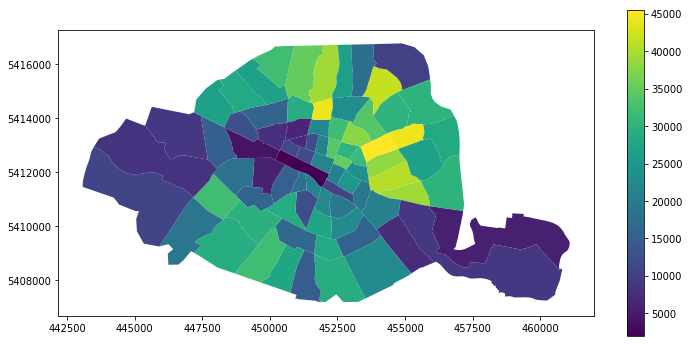

In [48]:
# %load _solved/solutions/01-introduction-geospatial-data18.py
# Make a plot of the districts colored by the population density
districts.plot(column='population_density', figsize=(12, 6), legend=True)

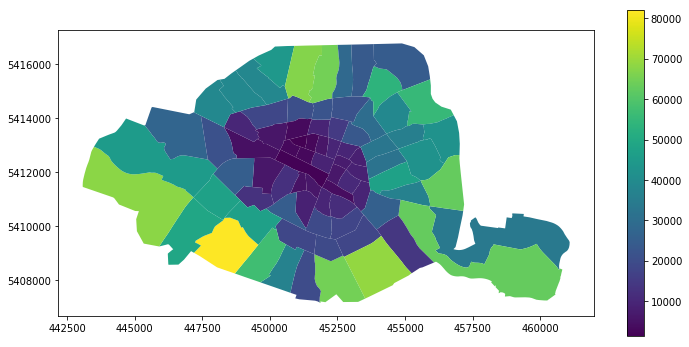

In [49]:
# %load _solved/solutions/01-introduction-geospatial-data19.py
# As comparison, the misleading plot when not turning the population number into a density
districts.plot(column='population', figsize=(12, 6), legend=True)

---

## For the curious: A bit more on importing and creating GeoDataFrames

### Note on `fiona`

Under the hood, GeoPandas uses the [Fiona library](http://toblerity.org/fiona/) (pythonic interface to GDAL/OGR) to read and write data. GeoPandas provides a more user-friendly wrapper, which is sufficient for most use cases. But sometimes you want more control, and in that case, to read a file with fiona you can do the following:


In [50]:
import fiona
from shapely.geometry import shape

with fiona.Env():
    with fiona.open("zip://./data/ne_110m_admin_0_countries.zip") as collection:
        for feature in collection:
            # ... do something with geometry
            geom = shape(feature['geometry'])
            # ... do something with properties
            print(feature['properties']['name'])

Afghanistan
Angola
Albania
United Arab Emirates
Argentina
Armenia
Antarctica
Fr. S. Antarctic Lands
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahamas
Bosnia and Herz.
Belarus
Belize
Bolivia
Brazil
Brunei
Bhutan
Botswana
Central African Rep.
Canada
Switzerland
Chile
China
Côte d'Ivoire
Cameroon
Dem. Rep. Congo
Congo
Colombia
Costa Rica
Cuba
N. Cyprus
Cyprus
Czechia
Germany
Djibouti
Denmark
Dominican Rep.
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Is.
France
Gabon
United Kingdom
Georgia
Ghana
Guinea
Gambia
Guinea-Bissau
Eq. Guinea
Greece
Greenland
Guatemala
Guyana
Honduras
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica
Jordan
Japan
Kazakhstan
Kenya
Kyrgyzstan
Cambodia
South Korea
Kosovo
Kuwait
Laos
Lebanon
Liberia
Libya
Sri Lanka
Lesotho
Lithuania
Luxembourg
Latvia
Morocco
Moldova
Madagascar
Mexico
Macedonia
Mali
Myanmar
Montenegro
Mongolia
Mozambique
Mauritania
Malawi
Malaysia

### Constructing a GeoDataFrame manually

In [51]:
geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

geometry  attribute1  attribute2
0  POINT (1 1)           1         0.1
1  POINT (2 2)           2         0.2

### Creating a GeoDataFrame from an existing dataframe

For example, if you have lat/lon coordinates in two columns:

In [52]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [53]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [54]:
gdf

City    Country  Latitude  Longitude               geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66 -34.58)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91 -15.78)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66 -33.45)
3        Bogota   Colombia      4.60     -74.08     POINT (-74.08 4.6)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86 10.48)

See http://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html for full example